<a href="https://colab.research.google.com/github/Emmanuel2000x/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
#Se importan las librerias necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
#Se le la URL del .json con la informacion que otorga la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos_json = pd.read_json(url)

In [3]:
#El DF original cuenta 7267 registros con 6 columnas |customerID|Churn|customer|phone|internet |account|
print(datos_json.shape)
print(datos_json.head(5))

(7267, 6)
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...

In [4]:
#Creamos una funcion encargada de normalizar todas las columnas anidadas
def normalize_nested_df(df: pd.DataFrame) -> pd.DataFrame:
  """
  Normaliza de forma recursiva las columnas anidadas de un DF
  Args:
    df (pd.DataFrame): Input DataFrame with potential nested structures.
  Returns:
    pd.DataFrame: Fully normalized (flattened) DataFrame.
  """
  df = df.copy()
  new_columns = []
  for col in df.columns:

    if df[col].apply(lambda x: isinstance(x, dict)).any():
      # Expand dictionaries into separate columns
      expanded = pd.json_normalize(df[col]).add_prefix(f'{col}_')
      df = df.drop(columns=[col])
      df = pd.concat([df, expanded], axis=1)
      return normalize_nested_df(df)  # Recursively normalize
    else:
      new_columns.append(col)

  return df


In [5]:
#Normalizacion del DF utilizando la funcion creada
flatt_DF = normalize_nested_df(datos_json)
#Ahora tenemos 21 columnas y ninguna con info anidada
print(flatt_DF.shape)
print(flatt_DF.head(3))

(7267, 21)
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No              

##Lista de columnas y su clasificacion

In [6]:
#Lista que almacena las Variables/Columnas que contiene el DF
Datos_dic = list(flatt_DF.columns)
print(Datos_dic)

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


In [7]:
#Clasificamos el tipo de dato de cada columna
Col_Bol = ['Churn', 'customer_SeniorCitizen','customer_Partner',
        'customer_Dependents','phone_PhoneService', 'phone_MultipleLines',
        'internet_OnlineSecurity', 'internet_OnlineBackup','internet_DeviceProtection', 'internet_TechSupport',
        'internet_StreamingTV', 'internet_StreamingMovies','account_PaperlessBilling']
Col_Str = ['customerID','customer_gender', 'internet_InternetService',
           'account_Contract','account_PaymentMethod']
Col_Flo = ['account_Charges.Monthly', 'account_Charges.Total']
Col_Int = ['customer_tenure']

#🔧 Transformación

## Conocemos el tipo de dato con el que viene cada columna


In [8]:
#Exploramos las columnas del data set y verificamos los tipos de datos
flatt_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [9]:
flatt_DF.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [10]:
#De origen el data set parece no contener errores nulos
print(flatt_DF.isna().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [11]:
#Replace de especios en blanco (e.g., '', ' ', '  ') with NaN
mod_DF = flatt_DF.replace(r'^\s*$', np.nan, regex=True)
#Lista de los indices donde hay valores NaN
error_indices = mod_DF[mod_DF.isna().any(axis=1)].index.tolist()

In [57]:
#Una vez transformados los datos detectamos lo siguiente
print(mod_DF.isna().sum())
print(f'Se encontraron {len(error_indices)} registros no validos,\nRepresentan el {100*len(error_indices)/len(flatt_DF.index):.2f}% del total')

ID_Cliente                0
Cancelacion               0
Genero                    0
Adulto_Mayor              0
Tiene_Pareja              0
Tiene_Dependientes        0
Meses_contratados         0
Servicio_Teléfono         0
Lineas_Multiples          0
Servicio_Internet         0
Seguridad_En_Linea        0
Respaldo_En_Linea         0
Proteccion_Dispositivo    0
Soporte_Tecnico           0
TV_Streaming              0
Peliculas_Streaming       0
Tipo_Contrato             0
Factura_Electronica       0
Metodo_Pago               0
Cargos_Mensuales          0
Cargos_Totales            0
Cargos_Diarios            0
dtype: int64
Se encontraron 235 registros no validos,
Representan el 3.23% del total


##Eliminado de registros sin info

In [13]:
"""
Dado que representan poca cantidad seran eliminados los registros
creando un nuevo data frame el cual contendra la transformacion
de la informacion
"""
mod_DF.dropna(inplace=True)
mod_DF.reset_index(drop=True,inplace=True)
print(mod_DF.shape)

(7032, 21)


In [14]:
#Comprobacion de la columna customerID
#Aseguramos el formato de los ID
mod_DF['customerID'] = mod_DF['customerID'].astype(str).str.upper()
#Buscamos registros duplicados
duplicados = mod_DF['customerID'].duplicated().any()
if not duplicados:
    print("No hay duplicados.")
else:
    print("Hay duplicados.")

No hay duplicados.


In [15]:
#Obvservamos los valores que contienen las otras columnas que no son numeros
for col in Datos_dic[1:-2]:
    print(f"Valores en {col}:")
    print(mod_DF[col].astype(str).unique())

Valores en Churn:
['No' 'Yes']
Valores en customer_gender:
['Female' 'Male']
Valores en customer_SeniorCitizen:
['0' '1']
Valores en customer_Partner:
['Yes' 'No']
Valores en customer_Dependents:
['Yes' 'No']
Valores en customer_tenure:
['9' '4' '13' '3' '71' '63' '7' '65' '54' '72' '5' '56' '34' '1' '45' '50'
 '23' '55' '26' '69' '37' '49' '66' '67' '20' '43' '59' '12' '27' '2' '25'
 '29' '14' '35' '64' '39' '40' '11' '6' '30' '70' '57' '58' '16' '32' '33'
 '10' '21' '61' '15' '44' '22' '24' '19' '47' '62' '46' '52' '8' '60' '48'
 '28' '41' '53' '68' '31' '36' '17' '18' '51' '38' '42']
Valores en phone_PhoneService:
['Yes' 'No']
Valores en phone_MultipleLines:
['No' 'Yes' 'No phone service']
Valores en internet_InternetService:
['DSL' 'Fiber optic' 'No']
Valores en internet_OnlineSecurity:
['No' 'Yes' 'No internet service']
Valores en internet_OnlineBackup:
['Yes' 'No' 'No internet service']
Valores en internet_DeviceProtection:
['No' 'Yes' 'No internet service']
Valores en internet_T

Con el analisis anterior encontramos que en la columna Churn hay registros en blanco, ademas en las columnas de servicios se presenta el "No", "No phone service" y "No internet service"

In [16]:
#convirtiendo el tipo de dato a float
mod_DF[Col_Flo] = mod_DF[Col_Flo].apply(pd.to_numeric, errors='coerce')

In [17]:
#Reemplazamos "Yes" y "No" por 1 y 0
mod_DF[Col_Bol] = mod_DF[Col_Bol].apply(lambda x: x.replace({
    'No': '0', 'No internet service': '0', 'No phone service': '0'})
    .replace('Yes','1'))
#Cambiamos el tipo de dato a booleano
mod_DF[Col_Bol] = mod_DF[Col_Bol].astype(int)#.astype(bool)

In [18]:
#Cambiamos el tipo de dato de las columnas de texto
mod_DF[Col_Str] = mod_DF[Col_Str].astype('string')

##Columna de cuentas diarias

In [19]:
#Se crea la columna de cuentas diarias apartir del cargo mensual
mod_DF['account_Charges.daily'] = (mod_DF['account_Charges.Monthly']/30).round(2)

In [20]:
#DF resultante de la transformacion
mod_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   string 
 1   Churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   string 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   int64  
 5   customer_Dependents        7032 non-null   int64  
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   int64  
 8   phone_MultipleLines        7032 non-null   int64  
 9   internet_InternetService   7032 non-null   string 
 10  internet_OnlineSecurity    7032 non-null   int64  
 11  internet_OnlineBackup      7032 non-null   int64  
 12  internet_DeviceProtection  7032 non-null   int64  
 13  internet_TechSupport       7032 non-null   int64

##Traduccion de variables

In [44]:
mod_DF.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelacion",
    "customer_gender": "Genero",
    "customer_SeniorCitizen": "Adulto_Mayor",
    "customer_Partner": "Tiene_Pareja",
    "customer_Dependents": "Tiene_Dependientes",
    "customer_tenure": "Meses_contratados",
    "phone_PhoneService": "Servicio_Teléfono",
    "phone_MultipleLines": "Lineas_Multiples",
    "internet_InternetService": "Servicio_Internet",
    "internet_OnlineSecurity": "Seguridad_En_Linea",
    "internet_OnlineBackup": "Respaldo_En_Linea",
    "internet_DeviceProtection": "Proteccion_Dispositivo",
    "internet_TechSupport": "Soporte_Tecnico",
    "internet_StreamingTV": "TV_Streaming",
    "internet_StreamingMovies": "Peliculas_Streaming",
    "account_Contract": "Tipo_Contrato",
    "account_PaperlessBilling": "Factura_Electronica",
    "account_PaymentMethod": "Metodo_Pago",
    "account_Charges.Monthly": "Cargos_Mensuales",
    "account_Charges.Total": "Cargos_Totales",
    "account_Charges.daily": "Cargos_Diarios"
}, inplace=True)
mo

#📊 Carga y análisis

In [45]:
print(mod_DF.describe(include='all').round(2))

        ID_Cliente  Cancelacion Genero  Adulto_Mayor  Tiene_Pareja  \
count         7032      7032.00   7032       7032.00       7032.00   
unique        7032          NaN      2           NaN           NaN   
top     0015-UOCOJ          NaN   Male           NaN           NaN   
freq             1          NaN   3549           NaN           NaN   
mean           NaN         0.27    NaN          0.16          0.48   
std            NaN         0.44    NaN          0.37          0.50   
min            NaN         0.00    NaN          0.00          0.00   
25%            NaN         0.00    NaN          0.00          0.00   
50%            NaN         0.00    NaN          0.00          0.00   
75%            NaN         1.00    NaN          0.00          1.00   
max            NaN         1.00    NaN          1.00          1.00   

        Tiene_Dependientes  Meses_contratados  Servicio_Teléfono  \
count              7032.00            7032.00             7032.0   
unique                 

##Distribucion de evasión

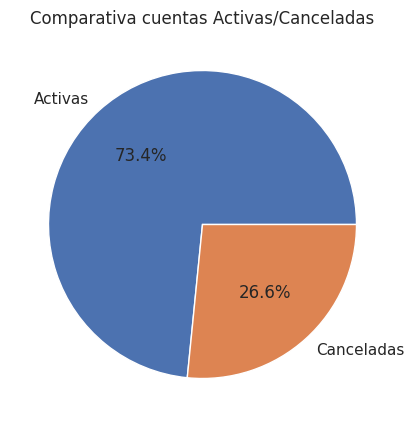

In [41]:
total_churn = mod_DF['Cancelacion'].value_counts()
estados = ['Activas', 'Canceladas']
plt.figure(figsize=(5,5))
plt.pie(total_churn, labels=estados, autopct='%1.1f%%')
plt.title('Comparativa cuentas Activas/Canceladas')
plt.show()

##Recuento de evasión por variables categóricas

In [114]:
def categories_chart(df,categories:list):
    rows = len(categories)
    cols = len(df['Cancelacion'].unique())

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
    fig.suptitle('Recuento de evasión por variables categóricas', fontsize=16)

    label_colors = {
    'Male': '#16537e',
    'Female': '#ff8383',
    'Si': '#66bb6a',  # green
    'No': '#ef5350',  # red
    'One year': '#e69138',
    'Month-to-month': '#6aa84f',
    'Two year': '#ff0054',
    'Mailed check': "#a8dadc",  # Pale cyan
    'Electronic check': "#f7ede2",  # Cream
    'Credit card (automatic)': "#f5cac3",  # Blush pink
    'Bank transfer (automatic)':"#84a59d",  # Muted green
    'DSL': '#48aac0',
    'Fiber optic': '#3eb99d'
    }

    for i, col in enumerate(categories):
      for j, status in enumerate(df['Cancelacion'].unique()):

        sub_df = df[df['Cancelacion'] == status]
        counts = sub_df[col].value_counts()
        labels = ['Si' if val == 1 else 'No' if val == 0
                  else str(val) for val in counts.index]
        colors = [label_colors.get(label, '#cccccc') for label in labels]  # default color if not found
        axs[i, j].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors)
        axs[i, j].set_title(f"Cuentas {'activas' if status == 0 else 'canceladas'} por {col}",
        fontsize = 14)
        #axs[i, j].axis('equal')

    # Borra el espacio no usado
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])
    fig.show()
    return

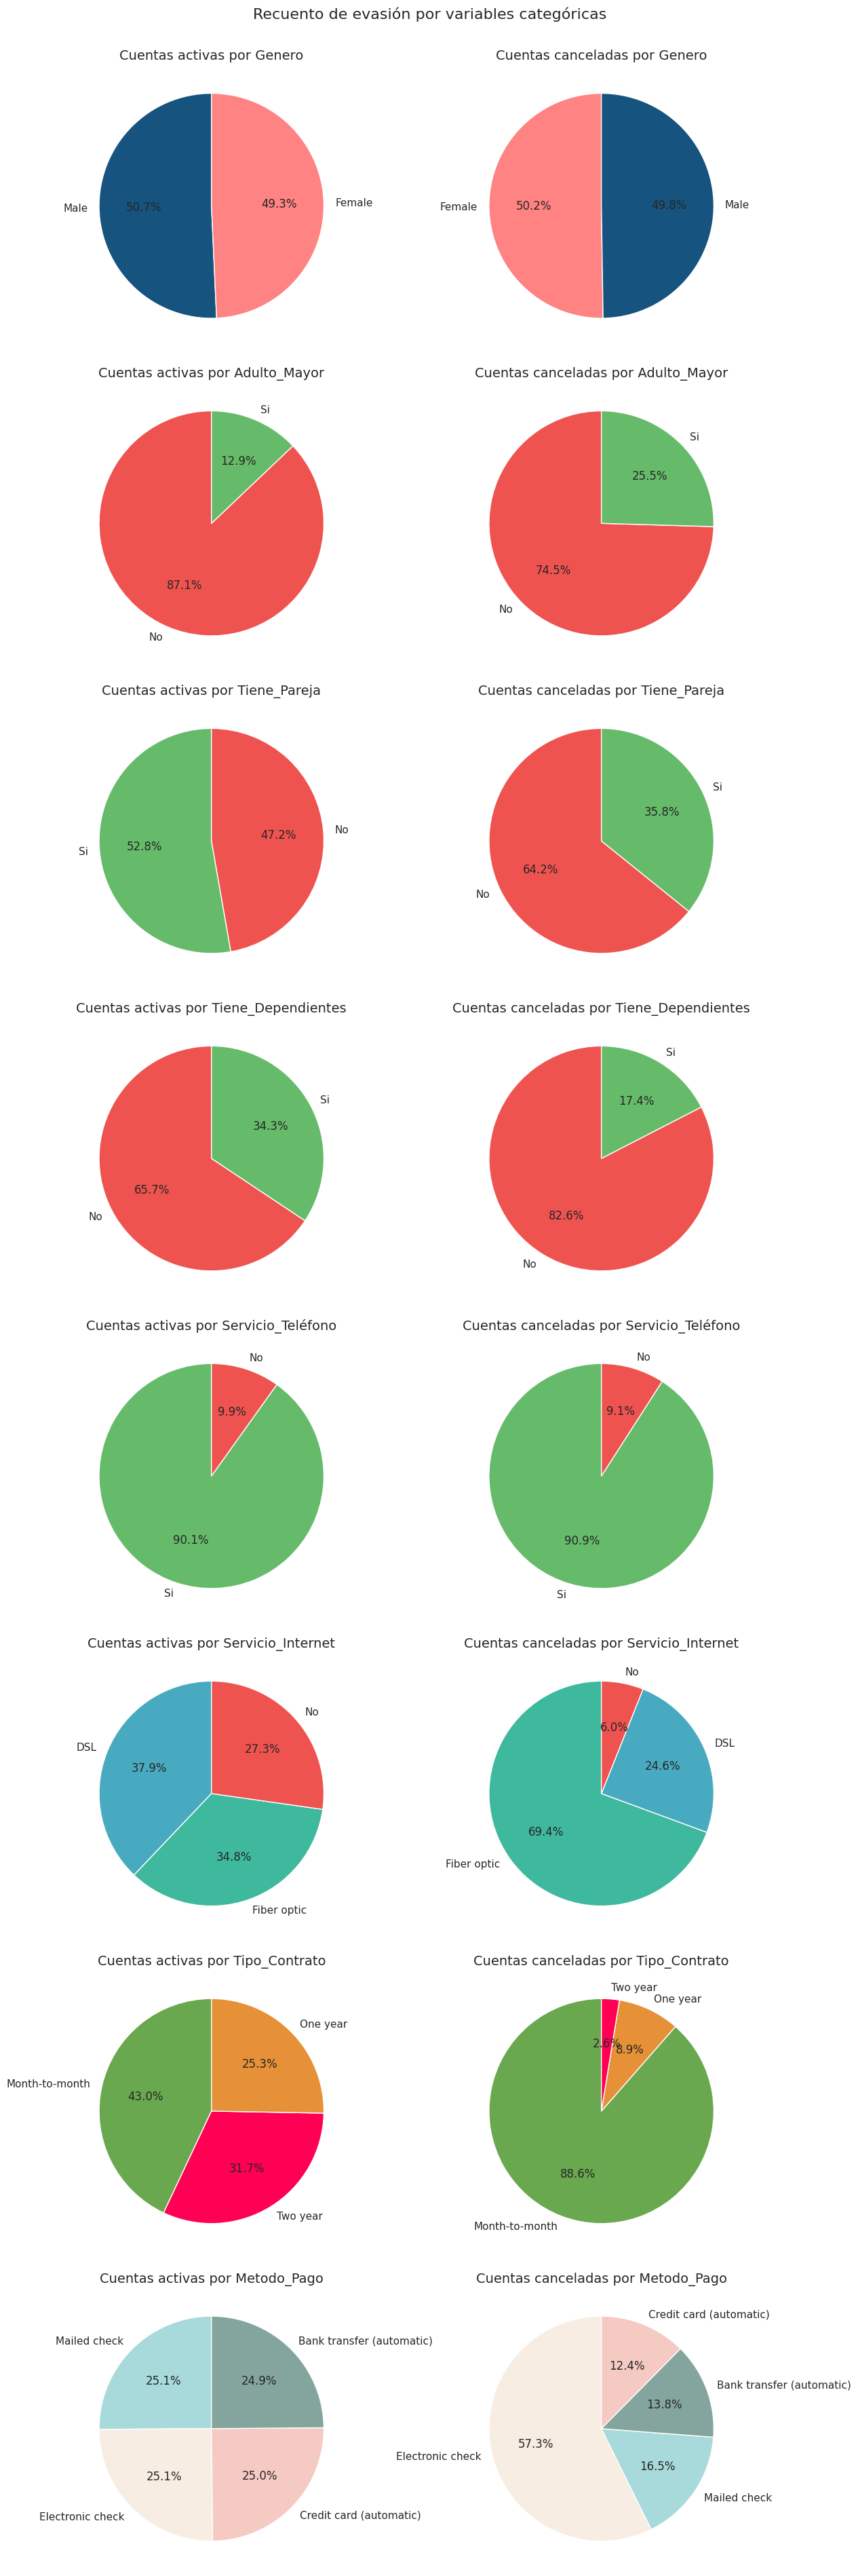

In [115]:
categories_var = ['Genero', 'Adulto_Mayor', 'Tiene_Pareja','Tiene_Dependientes',
                  'Servicio_Teléfono','Servicio_Internet','Tipo_Contrato','Metodo_Pago']
categories_chart(mod_DF,categories_var)

##Conteo de evasión por variables numéricas

In [247]:
numeric_var =['Meses_contratados', 'Cargos_Diarios','Cargos_Mensuales','Cargos_Totales']


In [248]:
print(activos_DF[numeric_var].describe().round(2))

       Meses_contratados  Cargos_Diarios  Cargos_Mensuales  Cargos_Totales
count            5163.00         5163.00           5163.00         5163.00
mean               37.65            2.04             61.31         2555.34
std                24.08            1.04             31.09         2329.46
min                 1.00            0.61             18.25           18.80
25%                15.00            0.84             25.10          577.83
50%                38.00            2.15             64.45         1683.60
75%                61.00            2.95             88.48         4264.12
max                72.00            3.96            118.75         8672.45


In [249]:
print(cancelados_DF[numeric_var].describe().round(2))

       Meses_contratados  Cargos_Diarios  Cargos_Mensuales  Cargos_Totales
count            1869.00         1869.00           1869.00         1869.00
mean               17.98            2.48             74.44         1531.80
std                19.53            0.82             24.67         1890.82
min                 1.00            0.63             18.85           18.85
25%                 2.00            1.87             56.15          134.50
50%                10.00            2.66             79.65          703.55
75%                29.00            3.14             94.20         2331.30
max                72.00            3.94            118.35         8684.80


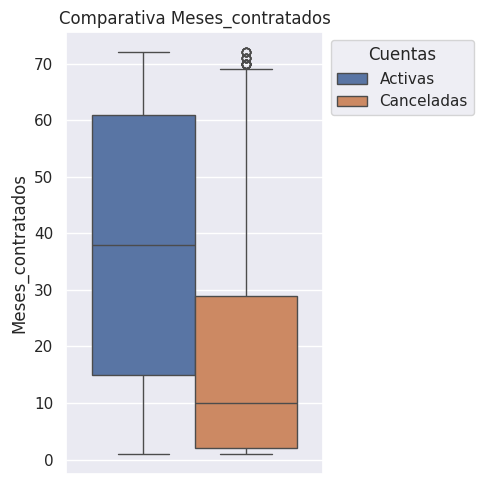

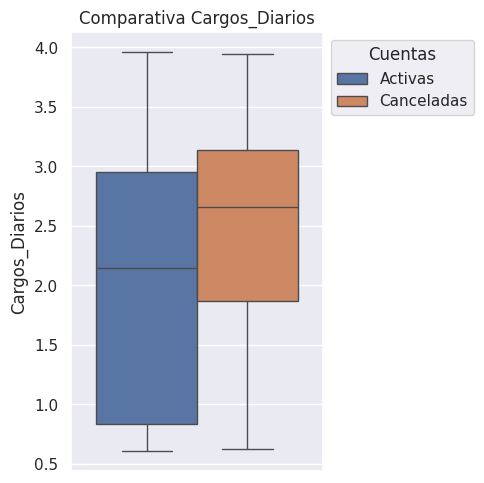

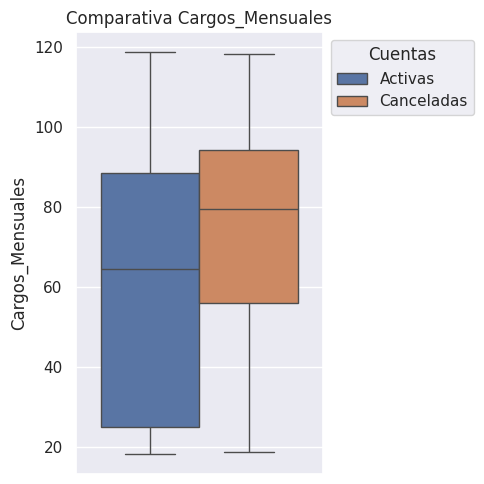

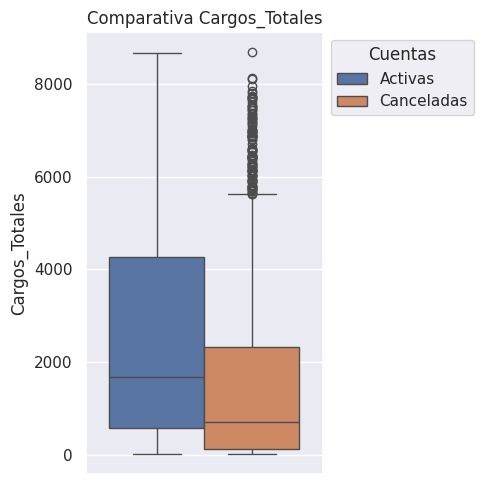

In [250]:
#sns.boxplot(mod_DF,x='Cancelacion',y='Cargos_Mensuales')

for col in numeric_var:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=mod_DF, y=col, hue='Cancelacion')
    plt.title(f'Comparativa {col}')
    plt.legend(['Activas', 'Canceladas'],title='Cuentas', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

In [251]:
import plotly.express as px

# Crear un gráfico por cada variable
for var in numeric_var:
    fig = px.box(
        mod_DF,
        x='Cancelacion',
        y=var,
        color='Estado',
        color_discrete_map={'Activo': '#2A5CAA', 'Baja': '#D62728'},
        points='all',
        title=f'Distribución de {var} por Estado'
    )

    fig.update_traces(jitter=0.3, marker_opacity=0.4)
    fig.update_layout(
        font=dict(family="Fira Code", size=14),
        yaxis_title=var,
        xaxis_title="Estado",
        boxmode='group',
        showlegend=False
    )
    fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['ID_Cliente', 'Cancelacion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_contratados', 'Servicio_Teléfono', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_En_Linea', 'Respaldo_En_Linea', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios'] but received: Estado

#📄Informe final